In [1]:
## importing all libraries we might need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:

## Reading Of Dataset
##df = pd.read_csv("C:\\Users\\iamam\\OneDrive\\Desktop\\Python Tutorial\\College python\\heart.csv")
df = pd.read_csv(r"C:\Users\iamam\OneDrive\Desktop\Python Tutorial\College python\heart.csv")

In [3]:
## reading the data type of data set whic we are working on
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# About dataset which columb represent what


#Age : Age of the patient

#Sex : Sex of the patient

#cp : Chest Pain type chest pain type
#    Value 1: typical angina
#    Value 2: atypical angina
#    Value 3: non-anginal pain
#    Value 4: asymptomatic

#trtbps : resting blood pressure (in mm Hg)

#chol : cholestoral in mg/dl fetched via BMI sensor

# fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

# restecg:resting electrocardiographic result
#    Value 0: normal
#    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

# thalach : maximum heart rate achieved

#exang: exercise induced angina (1 = yes; 0 = no)

# oldpeak : STdpression invluded by exercise relative to rest ('ST' relates to positions on the ECCG plot)

#slp(slope) : the slope of the peak exercise ST segment 
#           0 : downslopping;
#           1 : flat;
#           2 : upslopping;

#caa: number of major vessels (0-3)

# thall : Displays the thalassemia : 1,3 = normal  ,6 = fixed defect, 7 = reversible defect: no proper blood movement when excercising

# output : 0 = NO , he is not in danger of heart attack ,1 = YES , he is  in the danger of heart attack

In [5]:
## through describe we can see the mean and deviation of data, minimum and maximum values and we can also see quartile of sata set
## T is used for transpose the matric or decribe data set
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
## through shape we can see the dimention of data set
df.shape

(303, 14)

In [7]:
## throught isnull() we can check where is the missing value and by sum() we can count the total number of missing value
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
### Checking for duplicates records
duplicate_rows = df[df.duplicated()]
print("Number of Duplicate rows:",duplicate_rows.shape)

Number of Duplicate rows: (1, 14)


In [9]:
### Removing the Duplicate Rows :
df = df.drop_duplicates()

In [10]:
# it shows the rows and columbs of the dataset
df.shape

(302, 14)

<Axes: >

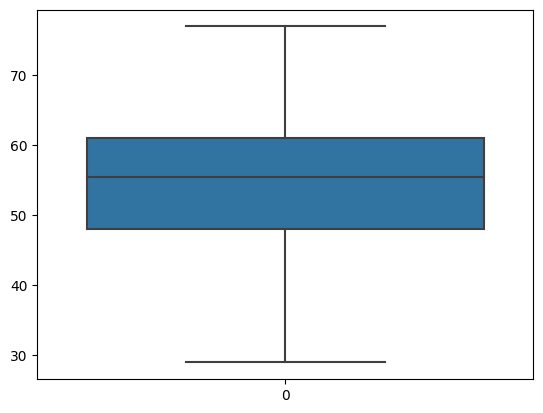

In [11]:
### Detecting of Outliers in the Datasets
sns.boxplot(df['age'])  ### Age has no outlier

<Axes: ylabel='count'>

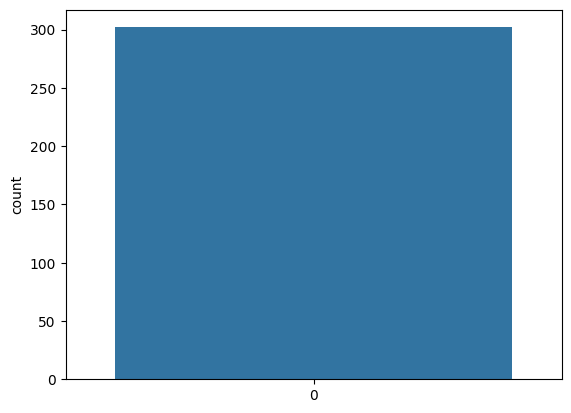

In [12]:
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
sns.countplot(df['sex'])

<Axes: >

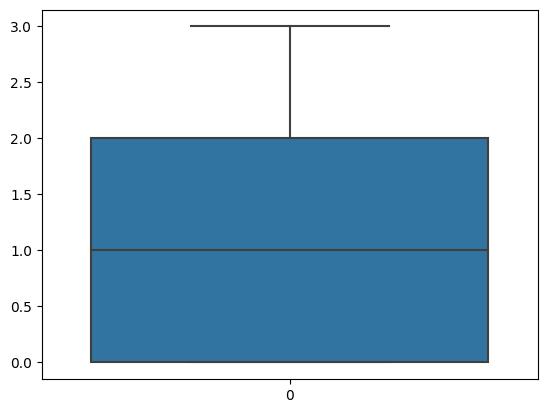

In [13]:
### Chest Pain has no outlier
sns.boxplot(df['cp'])  

<Axes: >

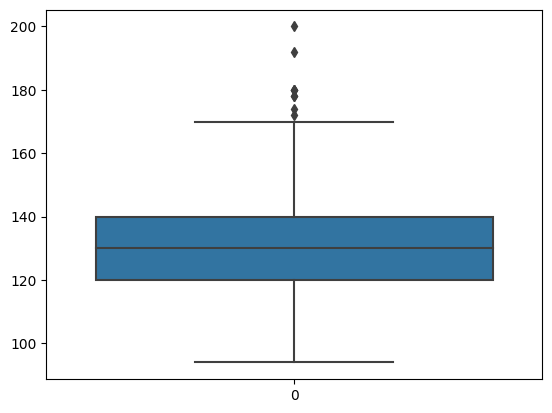

In [14]:
sns.boxplot(df['trtbps']) #### There are some outliers in Resting Blood Pressure
#### We have to imput this outlier data

<Axes: >

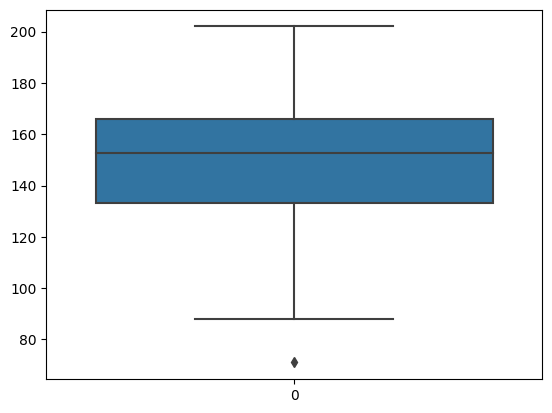

In [15]:
### One outlier in the Lower Side
sns.boxplot(df['thalachh'])  

<Axes: >

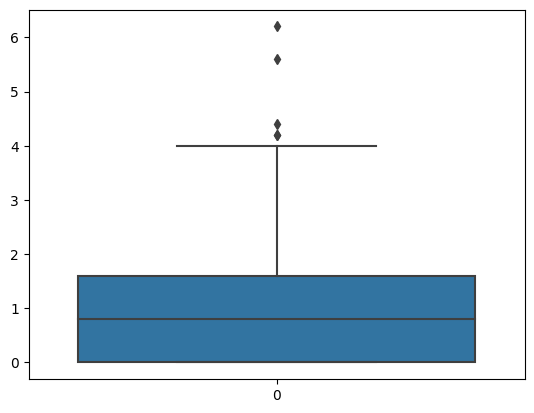

In [16]:
### many outlier in the upper Side
sns.boxplot(df['oldpeak']) 

<Axes: >

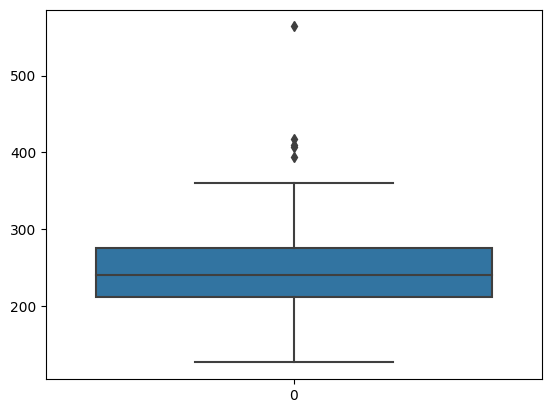

In [17]:
### Cholestrol has many outlier in upper side
sns.boxplot(df['chol'])  

<Axes: >

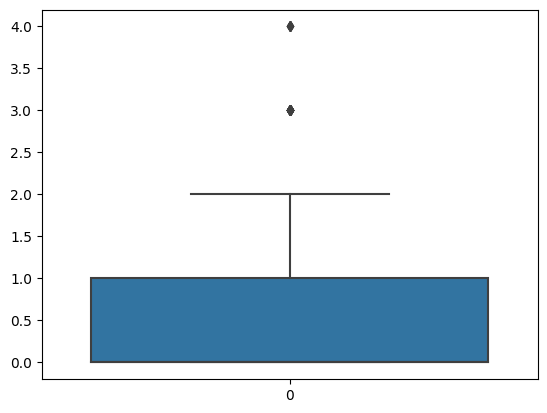

In [18]:
# Caa has 2 outlier on the upper side
sns.boxplot(df['caa'])

<Axes: >

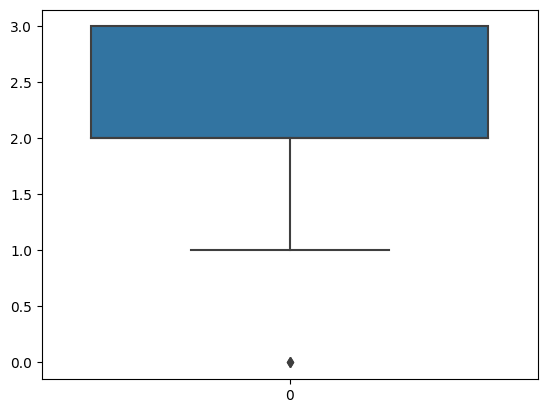

In [19]:
#thall has one outlier on the lower side
sns.boxplot(df['thall'])

In [20]:
### IQR - Interquartile Range
# The difference between the upper and lower quartile is known as the interquartile range.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [21]:
IQR = Q3 - Q1
IQR

age         13.00
sex          1.00
cp           2.00
trtbps      20.00
chol        63.75
fbs          0.00
restecg      1.00
thalachh    32.75
exng         1.00
oldpeak      1.60
slp          1.00
caa          1.00
thall        1.00
output       1.00
dtype: float64

In [22]:
### Removing Outliers using IQR
data = df[~((df<(Q1 - 1.5*IQR))| (df>(Q3 + 1.5*IQR))).any(axis = 1)]

In [23]:
# again cheching the rows and columbs of dataset to insure that our formula has worked or not and now on new data set we have to perform operation
data.shape

(228, 14)

In [24]:
### Certian Features which are important in Predicting the heart Attack
pearson_Corr = data.corr()

<Axes: >

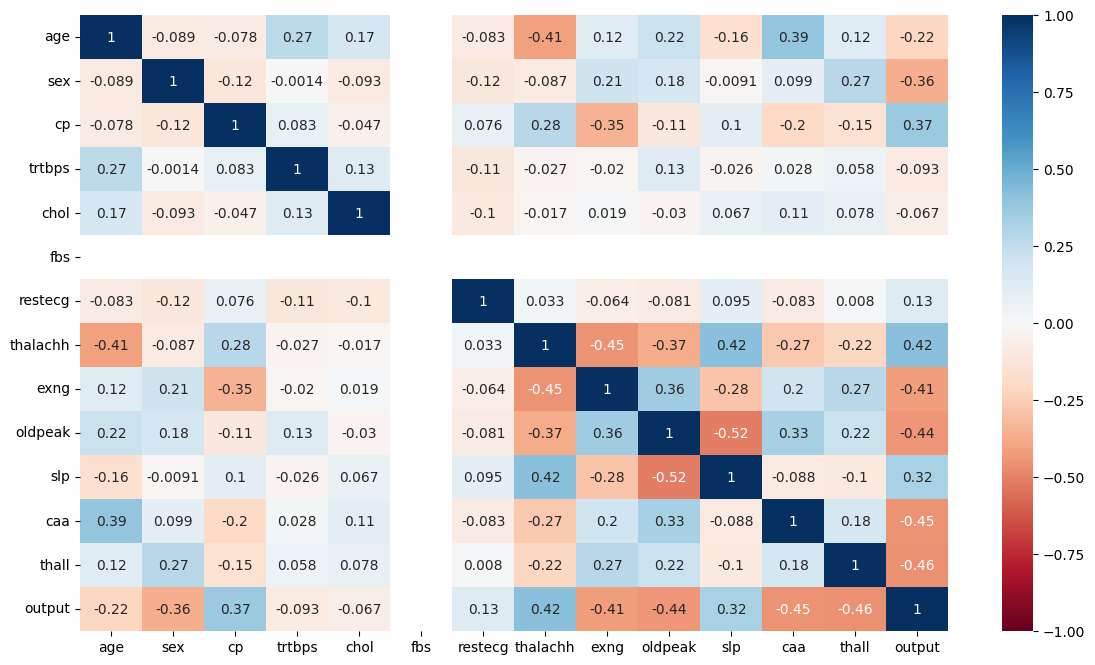

In [25]:
#Correlaton matrix with heatmap - It indicates how the features are related to each other or to the outut variable

fig = plt.subplots(figsize = (14,8))
sns.heatmap(pearson_Corr,vmax=1,vmin = -1,annot = True,cmap= 'RdBu')

In [26]:
#The corr() method calculates the relationship between each column in your data set.
pearson_Corr['output']

age        -0.215120
sex        -0.363483
cp          0.371115
trtbps     -0.092560
chol       -0.067321
fbs              NaN
restecg     0.131641
thalachh    0.417870
exng       -0.414407
oldpeak    -0.439194
slp         0.323569
caa        -0.447167
thall      -0.455780
output      1.000000
Name: output, dtype: float64

In [27]:
### Dropping Minimum Correlation Scores Parameters
#fbs, trtbps,chol
del data['trtbps']
del data['chol']
del data['fbs']

In [28]:
#again checking the rows and columbs of data set so we have the idea of data set 
data.shape

(228, 11)

In [29]:
X = data.drop("output",axis = 1)   ### Independent
y = data['output']  ### Dependent

In [30]:
# printing the values of y
y

1      1
2      1
3      1
4      1
5      1
      ..
296    0
298    0
299    0
301    0
302    0
Name: output, Length: 228, dtype: int64

In [31]:
# counting the unique values of output just like bin where we are counting the same vlaues and giving the partition a common name for each division 
data.output.value_counts()

output
1    132
0     96
Name: count, dtype: int64

In [32]:
##  .skew is used to get the data is negative or not
##        (-)  ->  mean < median
##        (+)  ->  mean > median
##  .kurt() showes the value is symmetrical or not

In [33]:
#Again checking the datatypes and null value of the new edited dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 1 to 302
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       228 non-null    int64  
 1   sex       228 non-null    int64  
 2   cp        228 non-null    int64  
 3   restecg   228 non-null    int64  
 4   thalachh  228 non-null    int64  
 5   exng      228 non-null    int64  
 6   oldpeak   228 non-null    float64
 7   slp       228 non-null    int64  
 8   caa       228 non-null    int64  
 9   thall     228 non-null    int64  
 10  output    228 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 21.4 KB


In [34]:
# Checking the mean values and quartile of the dataset
data.describe()

,age,sex,cp,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.00000,228.000000,228.000000
mean,53.333333,0.675439,0.942982,0.548246,151.070175,0.315789,0.946053,1.451754,0.47807,2.315789,0.578947
std,9.229016,0.469241,1.020190,0.516125,22.492963,0.465852,1.035422,0.587945,0.69893,0.560299,0.494814
min,29.000000,0.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,45.000000,0.000000,0.000000,0.000000,137.500000,0.000000,0.000000,1.000000,0.00000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,1.000000,155.000000,0.000000,0.600000,1.500000,0.00000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,1.000000,168.250000,1.000000,1.600000,2.000000,1.00000,3.000000,1.000000
max,76.000000,1.000000,3.000000,2.000000,202.000000,1.000000,4.000000,2.000000,2.00000,3.000000,1.000000


In [35]:
# Here we are defining the X and checking the shape of X
X = data[['age','sex','cp','restecg','thalachh','exng','oldpeak','slp','caa','thall']]
X.shape

(228, 10)

In [36]:
# Here we are defining the y and checking the shape of y
y = data['output']
y.shape

(228,)

In [37]:
# By using train_test_split we are dividing the dataset in train and test data set
# Generely we take the train dataset 70% and test dataset 30% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 1) ### Bias in Selection of ratio

In [38]:
# checking the uppar dataset values of X_train by using head() method
X_train.head()

,age,sex,cp,restecg,thalachh,exng,oldpeak,slp,caa,thall
237,60,1,0,0,170,0,1.2,1,2,3
174,60,1,0,0,132,1,2.4,1,2,3
161,55,0,1,1,166,0,1.2,2,0,2
218,65,1,0,0,127,0,2.8,1,1,3
17,66,0,3,1,114,0,2.6,0,0,2


In [39]:
# Checking the shape of X_test and y_test dataset
X_test.shape,y_test.shape

((69, 10), (69,))

In [40]:
# Checking the upper value of X_test dataset
X_test.head()

,age,sex,cp,restecg,thalachh,exng,oldpeak,slp,caa,thall
47,47,1,2,0,156,0,0.0,2,0,2
212,39,1,0,1,140,0,1.2,1,0,3
121,59,1,0,0,182,0,0.0,2,0,2
74,43,0,2,1,165,0,0.2,1,0,2
262,53,1,0,1,95,1,2.0,1,2,3


In [41]:
# Checking the null values in each column by isnull() method and counting the all null values in each bucket by using Sum() method
data.isnull().sum()

age         0
sex         0
cp          0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [42]:
# Here we are using gaussianNB model to get the accuracy of the model
#We are fitting the values by using fit() method

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [43]:
y_pred = nb.predict(X_test)
print(y_pred)

print(accuracy_score(y_test, y_pred))

[1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1
 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0]
0.8115942028985508


In [44]:

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

print("Accuracy:",accuracy_score(y_test, rfc_predict))

Accuracy: 0.855072463768116


In [54]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[15 11]
 [ 6 37]]


Accuracy of K-NeighborsClassifier: 75.36231884057972 

              precision    recall  f1-score   support

           0       0.71      0.58      0.64        26
           1       0.77      0.86      0.81        43

    accuracy                           0.75        69
   macro avg       0.74      0.72      0.73        69
weighted avg       0.75      0.75      0.75        69



In [56]:
print("Accuracy(through GassuainNB):",accuracy_score(y_test, y_pred))  #gaussianNB
print("Accuracy(through Randomforest):",accuracy_score(y_test, rfc_predict))   #Randomforestclassifier
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')  #KNeighborsClassifier

Accuracy(through GassuainNB): 0.8115942028985508
Accuracy(through Randomforest): 0.855072463768116
Accuracy of K-NeighborsClassifier: 75.36231884057972 

